In [ ]:
# https://www.kaggle.com/salihacur/diabetes

In [1]:
#import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
#load and read data

df=pd.read_csv('diabetes.csv')

In [3]:
# display the first 5 rows of data

df.rename(columns={'DiabetesPedigreeFunction':'History'},inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,History,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# gives a brief statistical view of the dataset
# gives a summary of the correlations between each data feature. Shows many zeros which could be used to 
# ....replace missing values

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,History,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#set display dimension for the graphs

#plt.rcParams['figure.figsize']=[8,5]

# PREPROCESSING

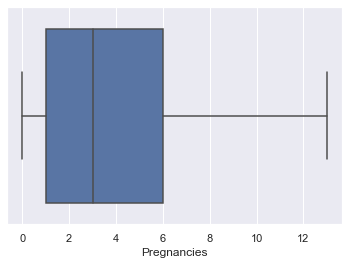

In [6]:
#identify outliers. Q3 + IQR*1.5 = 13 (IQR = 5). Remove outliers > 13
#display plot

m=df['Pregnancies'].median()
df['Pregnancies']=df['Pregnancies'].apply(lambda x: m if x > 13 else x)
sns.boxplot(x=df['Pregnancies']);
plt.xlabel('Pregnancies');

In [7]:
#identify count of zeros in the dataset

(df['Glucose']==0).value_counts()

False    763
True       5
Name: Glucose, dtype: int64

In [8]:
#Replacing zero values with mean

m=df['Glucose'].mean()
df['Glucose']=df['Glucose'].apply(lambda x: m if x==0 else x)
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,History,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.681605,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.270644,30.436016,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


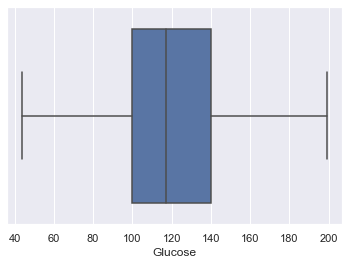

In [9]:
#identify outliers. Q3+IQR*1.5=201 (IQR = 40), and Q1-IQR*1.5 = 39. Remove outliers < 39
#display plot

df['Glucose']=df['Glucose'].apply(lambda x: m if x<39 else x)
sns.boxplot(x=df['Glucose']);

In [10]:
#identify count of zeros in the dataset

(df['BloodPressure']==0).value_counts()

False    733
True      35
Name: BloodPressure, dtype: int64

In [11]:
#Replacing zero values with mean

m=df['BloodPressure'].mean()
df['BloodPressure']=df['BloodPressure'].apply(lambda x: m if x == 0 else x )
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,History,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.681605,72.254807,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.270644,30.436016,12.115932,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


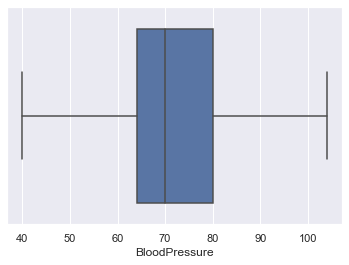

In [12]:
#identify outliers. Q3 + IQR*1.5 = 104 (IQR = 16), and Q1 - IQR*1.5 = 40. Remove outliers > 104 and < 40
#display plot

df['BloodPressure']=df['BloodPressure'].apply(lambda x: m if x > 104 or x < 40 else x )
sns.boxplot(x=df['BloodPressure']);

In [13]:
#identify count of zeros in the dataset 

(df['SkinThickness']==0).value_counts()

False    541
True     227
Name: SkinThickness, dtype: int64

In [14]:
#replacing zero values with mean

m=df['SkinThickness'].mean()
df['SkinThickness']=df['SkinThickness'].apply(lambda x: m if x==0 else x)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,History,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.681605,71.923396,26.606479,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.270644,30.436016,10.899029,9.631241,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,40.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.000000,199.000000,104.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


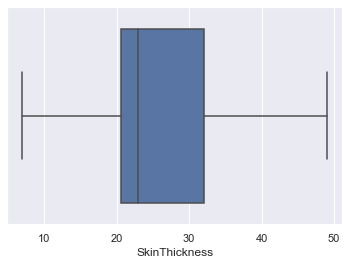

In [15]:
#identify outliers. Q3 + IQR*1.5 = 49 (IQR = 11.5). Remove outliers ie. > 49
#display boxplot

m=df['SkinThickness'].mean()
df['SkinThickness']=df['SkinThickness'].apply(lambda x: m if x > 49 else x )
sns.boxplot(x=df['SkinThickness']);

In [16]:
#identify count of zeros in the dataset 

(df['Insulin']==0).value_counts()

False    394
True     374
Name: Insulin, dtype: int64

In [17]:
#replacing zero values with mean and identify outliers

m=df['Insulin'].mean()
df['Insulin']=df['Insulin'].apply(lambda x: m if x ==0 else x)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,History,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.681605,71.923396,26.122466,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.270644,30.436016,10.899029,8.650532,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.000000,199.000000,104.000000,49.000000,846.000000,67.100000,2.420000,81.000000,1.000000


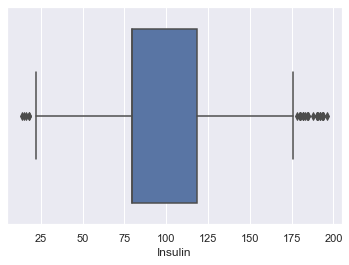

In [18]:
#identify outliers. Q3 + IQR*1.5 = 197 (IQR = 47). Remove outliers > 197
m=df['Insulin'].mean()
df['Insulin']=df['Insulin'].apply(lambda x: m if x > 197 else x )
sns.boxplot(x=df['Insulin']);

In [19]:
#identify count of zeros in the dataset 

(df['BMI']==0).value_counts()

False    757
True      11
Name: BMI, dtype: int64

In [20]:
#replacing zero values with mean and identify outliers

m=df['BMI'].mean()
df['BMI']=df['BMI'].apply(lambda x: m if x==0 else x)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,History,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.681605,71.923396,26.122466,94.652031,32.450805,0.471876,33.240885,0.348958
std,3.270644,30.436016,10.899029,8.650532,33.032290,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,118.660163,36.600000,0.626250,41.000000,1.000000
max,13.000000,199.000000,104.000000,49.000000,196.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


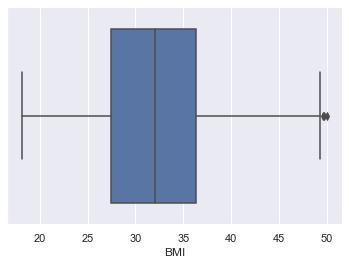

In [21]:
#identify outliers. Q3 + IQR*1.5 = 50.25 (IQR = 9).Removing outliers > 50.25

df['BMI']=df['BMI'].apply(lambda x: m if x>50 else x)
sns.boxplot(df['BMI']);

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


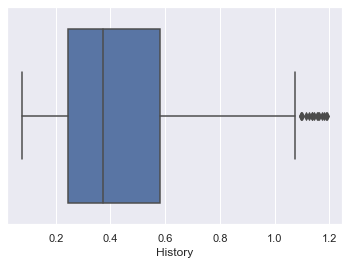

In [22]:
#identify outliers. Q3 + IQR*1.5 = 1.2 (IQR = 0.3825).Removing outliers > 1.2

m=df['History'].mean()
df['History']=df['History'].apply(lambda x: m if x>=1.2 else x)
sns.boxplot(df['History']);

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,History,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,3.782552,121.681605,71.923396,26.122466,94.652031,32.198775,0.43142,33.240885,0.348958
std,3.270644,30.436016,10.899029,8.650532,33.032290,6.410564,0.24505,11.760232,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.07800,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.24375,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,79.799479,32.000000,0.37250,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,118.660163,36.300000,0.58225,41.000000,1.000000
max,13.000000,199.000000,104.000000,49.000000,196.000000,50.000000,1.19100,81.000000,1.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


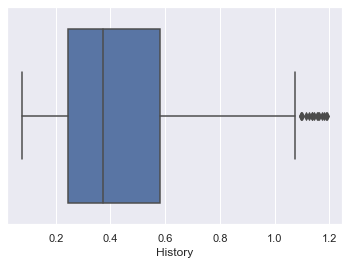

In [24]:
sns.boxplot(df['History']);

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,History,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,3.782552,121.681605,71.923396,26.122466,94.652031,32.198775,0.43142,32.810115,0.348958
std,3.270644,30.436016,10.899029,8.650532,33.032290,6.410564,0.24505,11.047889,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.07800,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.24375,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,79.799479,32.000000,0.37250,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,118.660163,36.300000,0.58225,40.000000,1.000000
max,13.000000,199.000000,104.000000,49.000000,196.000000,50.000000,1.19100,66.000000,1.000000


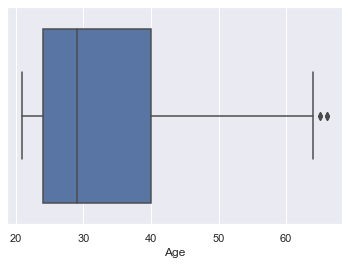

In [25]:
#identify outliers. Q3 + IQR*1.5 = 66.5 (IQR = 17).Removing outliers > 66.5

m=df['Age'].mean()
df['Age']=df['Age'].apply(lambda x: m if x>=66.5 else x)
sns.boxplot(df['Age']);
df.describe()

# EXPLORATORY DATA ANALYSIS

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


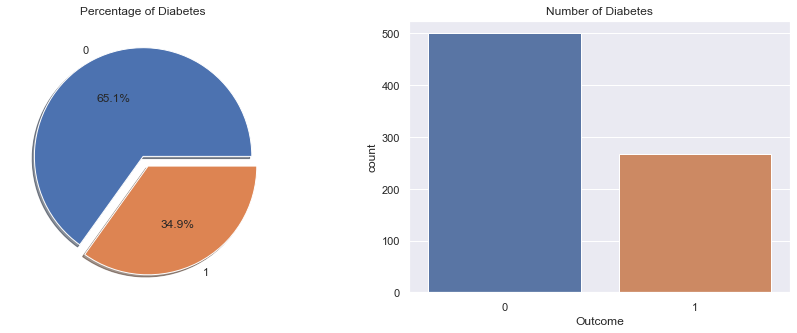

In [26]:
#set subplots parameters for pie and histogram total count of positive diabetes vs negative diabetes

fig, ax = plt.subplots(1,2, figsize=(15,5))
df['Outcome'].value_counts().plot.pie(explode= (0,0.1),autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Percentage of Diabetes')
ax[0].set_ylabel('')
sns.countplot('Outcome', data=df,ax=ax[1]);
ax[1].set_title('Number of Diabetes');


In [27]:
#display correlations

df1=df.corr()
df1=df1.iloc[:8,-1]
df1

Pregnancies      0.202492
Glucose          0.492908
BloodPressure    0.162487
SkinThickness    0.184485
Insulin          0.190386
BMI              0.300611
History          0.159691
Age              0.264841
Name: Outcome, dtype: float64

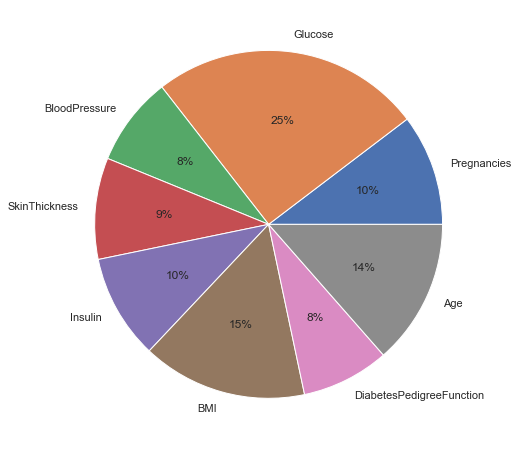

In [28]:
#customizing stylesheet and creating pie chart

plt.rcParams['figure.figsize']=[8,8]
labels=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.pie(df1,labels=labels,autopct='%1.0f%%');

In [29]:
#assigning x and y values 

x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','History','Age']]
y = df['Outcome']

In [30]:
#collect 100 samples of LogisticRegression for prediction test to arrive at mean score (positive test)
#convert x values to a standard normal distribution thru StandardScaler
#transform x values to a range between 0,1

# for i in range(100):
#     x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25,  shuffle=True)
#     pipe = make_pipeline(StandardScaler(),MinMaxScaler(), LogisticRegression())
#     pipe.fit(x_train,y_train)
#     k=pipe.predict(x_test).tolist()
    
# print(sum(k)/len(k))
# pipe.score(x_test,y_test)

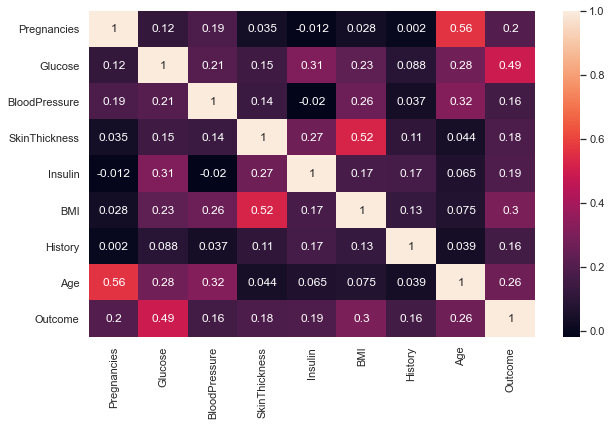

In [31]:
#displays the correlation using heatmap

plt.rcParams['figure.figsize']=[10,6]
sns.heatmap(df.corr(),annot=True);

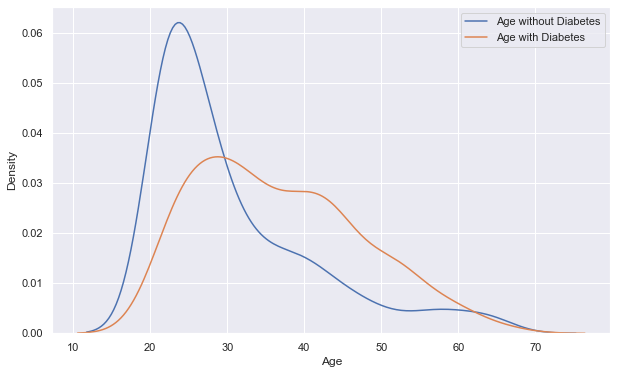

In [32]:
#create distribution of Age comparing between those without and with Diabetes

df5=df.loc[df['Outcome']==0,'Age']
df5_1=df.loc[df['Outcome']==1,'Age']
sns.kdeplot(df5);
sns.kdeplot(df5_1);
plt.legend(['Age without Diabetes','Age with Diabetes']);

 Avg BMI of those tested negative: 30.79
 Avg BMI of those tested positive: 34.83


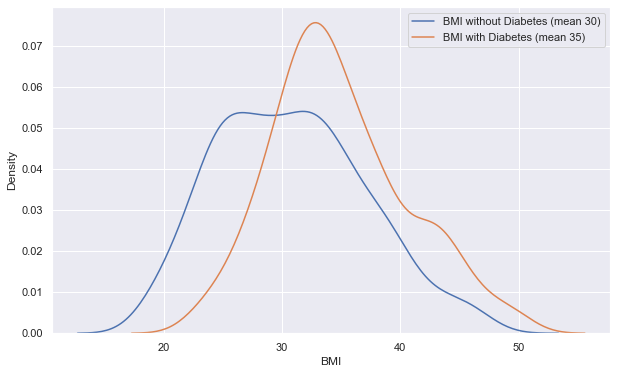

In [33]:
#create distribution of BMI comparing between those without and with Diabetes

print(f" Avg BMI of those tested negative: {round(df.loc[df['Outcome']==0,'BMI'].mean(),2)}")
print(f" Avg BMI of those tested positive: {round(df.loc[df['Outcome']==1,'BMI'].mean(),2)}")

df14=df.loc[df['Outcome']==0,'BMI'];
df15=df.loc[df['Outcome']==1,'BMI'];
sns.kdeplot(df14);
sns.kdeplot(df15);
plt.legend(['BMI without Diabetes (mean 30)','BMI with Diabetes (mean 35)']);

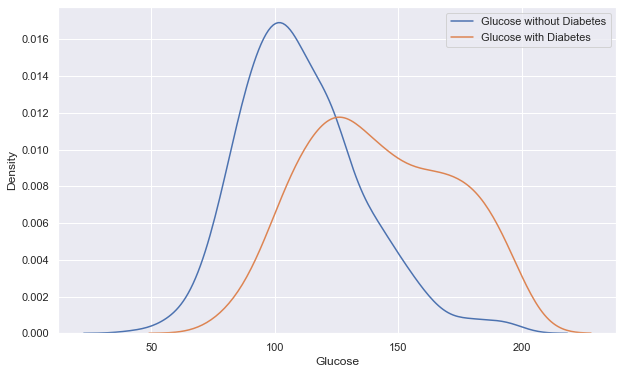

In [34]:
#create distribution of Glucose level comparing between those without and with Diabetes


df7=df.loc[df['Outcome']==0,'Glucose']
df7_1=df.loc[df['Outcome']==1,'Glucose']
sns.kdeplot(df7);
sns.kdeplot(df7_1);
plt.legend(['Glucose without Diabetes','Glucose with Diabetes']);

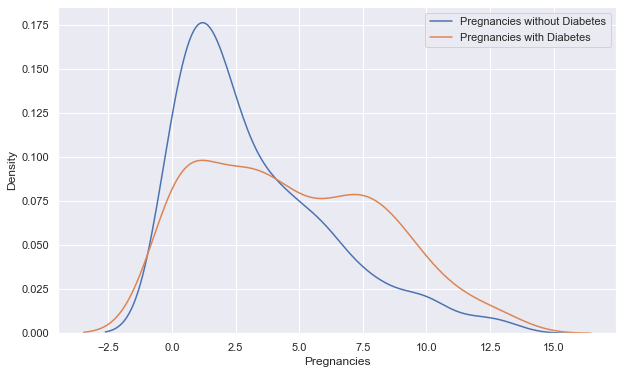

In [35]:
#create distribution of no. of pregnancies comparing between those without and with Diabetes


df8=df.loc[df['Outcome']==0,'Pregnancies']
df8_1=df.loc[df['Outcome']==1,'Pregnancies']
sns.kdeplot(df8);
sns.kdeplot(df8_1);
plt.legend(['Pregnancies without Diabetes','Pregnancies with Diabetes']);

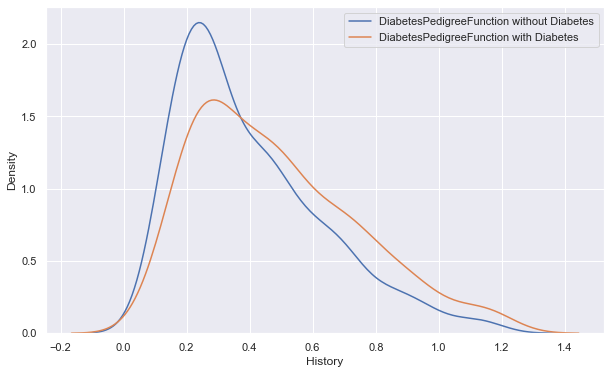

In [36]:
#create distribution of Diabetes history comparing between those without and with Diabetes

df16=df.loc[df['Outcome']==0, 'History']
df16_1=df.loc[df['Outcome']==1, 'History']
sns.kdeplot(df16);
sns.kdeplot(df16_1);
plt.legend(['DiabetesPedigreeFunction without Diabetes','DiabetesPedigreeFunction with Diabetes']);

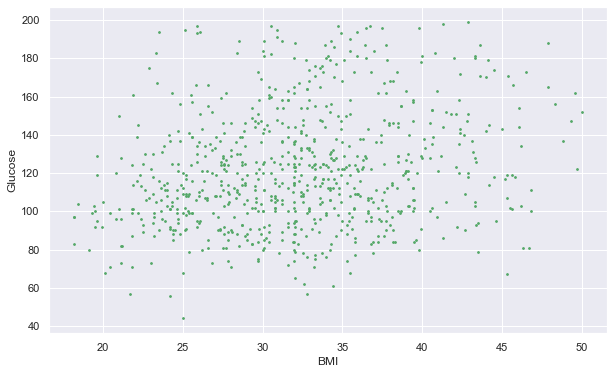

In [37]:
#create a scatter plot comparing BMI with Glucose

plt.scatter(x=df['BMI'], y=df['Glucose'], marker='o', s=3, c='g');
plt.xlabel('BMI');
plt.ylabel('Glucose');

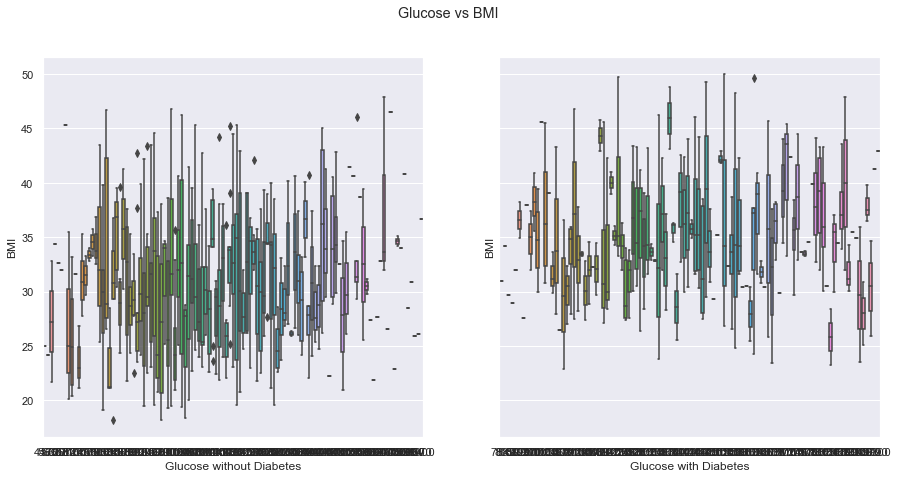

In [38]:
#creating 2 boxplots comparing BMI between 2 sets of pregnant females, without and with Diabetes

df12=df.loc[df['Outcome']==0,['Glucose','BMI']]
df12.rename(columns={'Glucose':'Glucose without Diabetes'},inplace=True)
df13=df.loc[df['Outcome']==1,['Glucose','BMI']]
df13.rename(columns={'Glucose':'Glucose with Diabetes'},inplace=True)
fig, axes=plt.subplots(1,2, figsize=(15,7), sharey=True);
fig.suptitle('Glucose vs BMI');
sns.boxplot(ax=axes[0],x='Glucose without Diabetes', y='BMI', data=df12);
sns.boxplot(ax=axes[1],x='Glucose with Diabetes', y='BMI', data=df13);

In [39]:
#creating a dataframe of BMI of pregnant females without and with diabetes

df10=df.loc[df['Outcome']==0,['Pregnancies','BMI']]
df10.reset_index(inplace=True)
del df10['index']
df10.rename(columns={'Pregnancies':'Pregnancies without diabetes'},inplace=True)

df11=df.loc[df['Outcome']==1,['Pregnancies','BMI']]
df11.reset_index(inplace=True)
del df11['index']
df11.rename(columns={'Pregnancies':'Pregnancies with Diabetes'}, inplace=True)

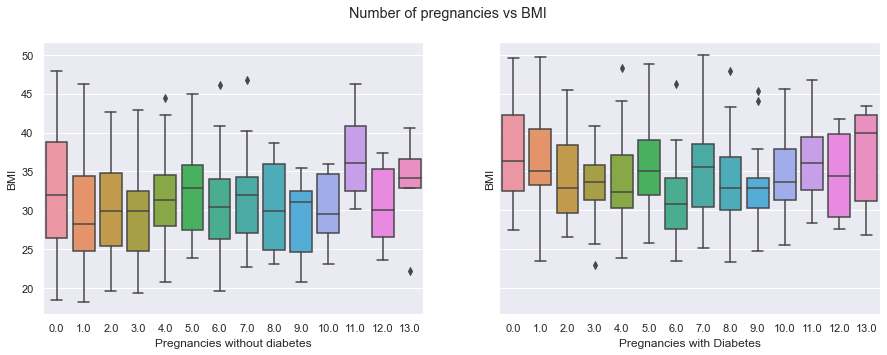

In [40]:
#creating 2 boxplots comparing BMI readings between pregnant females without and with diabetes

fig, axes = plt.subplots(1,2,figsize=(15,5),sharey=True)
fig.suptitle('Number of pregnancies vs BMI')
sns.boxplot(ax=axes[0],x='Pregnancies without diabetes', y='BMI', data=df10);
sns.boxplot(ax=axes[1],x='Pregnancies with Diabetes', y='BMI', data=df11);


# PREDICTOR

In [41]:
#split the x, y values between training and testing sets (testing 25%)
#convert x values to a standard normal distribution thru StandardScaler
#transform x values to a range between 0,1
#KEY in according to the order: No.of Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age

p=np.array([[4,100,90,20,90,20,0.1,30]])
f=np.array([[7,140,80,35,120,27,1,30]])
a=np.array([[3,200,60,15,80,20,0.5,70]])
b=np.array([[5,250,30,30,60,30,2,25]])
h=np.array([[2,80,70,20,25,15,0.1,30]])


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25,  shuffle=True)
lmx = make_pipeline(StandardScaler(),MinMaxScaler(), LogisticRegression())
lmx.fit(x_train,y_train)
y_pred=lmx.predict(x_test) 




In [42]:
#import sklearn confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
conf_mat=confusion_matrix(y_test, y_pred)
report=classification_report(y_test, y_pred)
conf_mat

array([[108,  22],
       [ 21,  41]], dtype=int64)

In [44]:
# Classification Accuracy - use float to perform true division, not integer division
tp = conf_mat[0,0]
tn = conf_mat[1,1]
fp = conf_mat[0,1]
fn = conf_mat[1,0]
ca = round((tp+tn) / (float(tp+tn+fp+fn)),2)
ca

0.78

In [45]:
print('Classification report: \n',report)

Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       130
           1       0.65      0.66      0.66        62

    accuracy                           0.78       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.78      0.78      0.78       192

